In [ ]:
import cv2
import random
from pathlib import Path

img_dir = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/images/val")
label_dir = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/val")

img_path = random.choice(list(img_dir.glob("*.png")))
label_path = label_dir / img_path.name.replace(".png", ".txt")

img = cv2.imread(str(img_path))
h, w = img.shape[:2]

with open(label_path) as f:
    for line in f:
        cls, x, y, bw, bh = map(float, line.split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imshow("YOLO Labels Check", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
from pathlib import Path

img_dir = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/images/val")
print("Val folder exists:", img_dir.exists())
print("Val image count:", len(list(img_dir.glob("*.png"))))


Val folder exists: True
Val image count: 1725


In [1]:
from pathlib import Path

label_dir = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/val")

empty_files = [f for f in label_dir.glob("*.txt") if f.stat().st_size == 0]

print(f"Total label files: {len(list(label_dir.glob('*.txt')))}")
print(f"Empty label files: {len(empty_files)}")

if empty_files:
    print("These files are empty:")
    for f in empty_files[:10]:  # show only a few
        print(f.name)
else:
    print("All label files contain data.")


Total label files: 1725
Empty label files: 467
These files are empty:
zipper_good_029.txt
zipper_good_001.txt
capsule_good_017.txt
capsule_good_003.txt
zipper_good_015.txt
hazelnut_good_013.txt
hazelnut_good_007.txt
wood_good_008.txt
transistor_good_003.txt
transistor_good_017.txt


In [1]:
from pathlib import Path

labels_dir = Path("data/processed/KolektorSDD/labels/train")
count_with_boxes = 0
count_empty = 0

for txt in labels_dir.glob("*.txt"):
    content = txt.read_text().strip()
    if content:
        count_with_boxes += 1
    else:
        count_empty += 1

print(f"Labels with bounding boxes: {count_with_boxes}")
print(f"Empty label files: {count_empty}")


Labels with bounding boxes: 0
Empty label files: 0


In [15]:
import os
import random
from pathlib import Path
import cv2

# Set your dataset path here
DATA_DIR = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD")  # or KolektorSDD
# DATA_DIR = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD") 

def sanity_check(data_dir):
    img_dir_train = data_dir / "images/train"
    lbl_dir_train = data_dir / "labels/train"
    img_dir_val = data_dir / "images/val"
    lbl_dir_val = data_dir / "labels/val"

    def count_labels(lbl_dir):
        empty, non_empty = 0, 0
        for file in lbl_dir.glob("*.txt"):
            if file.stat().st_size == 0:
                empty += 1
            else:
                non_empty += 1
        return empty, non_empty

    print(f"\nChecking dataset at: {data_dir}")

    # Folder existence
    for d in [img_dir_train, lbl_dir_train, img_dir_val, lbl_dir_val]:
        if not d.exists():
            print(f"[ERROR] Missing directory: {d}")
            return

    # Counts
    img_train = len(list(img_dir_train.glob("*.png")))
    img_val = len(list(img_dir_val.glob("*.png")))
    print(f"Train images: {img_train}, Val images: {img_val}")

    empty_train, non_empty_train = count_labels(lbl_dir_train)
    empty_val, non_empty_val = count_labels(lbl_dir_val)
    print(f"Train labels → Empty: {empty_train}, Non-empty: {non_empty_train}")
    print(f"Val labels   → Empty: {empty_val}, Non-empty: {non_empty_val}")

    if non_empty_train + non_empty_val == 0:
        print("[WARNING] No bounding boxes found! Check your mask paths.")
    else:
        print("[OK] Bounding boxes exist. Looks fine.")

    # Optional: visualize 3 random validation samples
    sample_imgs = random.sample(list(img_dir_val.glob("*.png")), min(3, img_val))
    for img_path in sample_imgs:
        lbl_path = lbl_dir_val / (img_path.stem + ".txt")
        img = cv2.imread(str(img_path))
        if lbl_path.exists() and lbl_path.stat().st_size > 0:
            with open(lbl_path) as f:
                for line in f:
                    cls, x_c, y_c, w, h = map(float, line.strip().split())
                    h_img, w_img = img.shape[:2]
                    x1 = int((x_c - w / 2) * w_img)
                    y1 = int((y_c - h / 2) * h_img)
                    x2 = int((x_c + w / 2) * w_img)
                    y2 = int((y_c + h / 2) * h_img)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imshow("Sample Check", img)
        cv2.waitKey(1000)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    sanity_check(DATA_DIR)



Checking dataset at: /Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD
Train images: 3629, Val images: 1725
Train labels → Empty: 3629, Non-empty: 0
Val labels   → Empty: 467, Non-empty: 1258
[OK] Bounding boxes exist. Looks fine.


In [8]:
import os
import random
from pathlib import Path
import cv2

# Set your dataset path here
# DATA_DIR = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD")  # or KolektorSDD
DATA_DIR = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD") 

def sanity_check(data_dir):
    img_dir_train = data_dir / "images/train"
    lbl_dir_train = data_dir / "labels/train"
    img_dir_val = data_dir / "images/val"
    lbl_dir_val = data_dir / "labels/val"

    def count_labels(lbl_dir):
        empty, non_empty = 0, 0
        for file in lbl_dir.glob("*.txt"):
            if file.stat().st_size == 0:
                empty += 1
            else:
                non_empty += 1
        return empty, non_empty

    print(f"\nChecking dataset at: {data_dir}")

    # Folder existence
    for d in [img_dir_train, lbl_dir_train, img_dir_val, lbl_dir_val]:
        if not d.exists():
            print(f"[ERROR] Missing directory: {d}")
            return

    # Counts
    img_train = len(list(img_dir_train.glob("*.png")))
    img_val = len(list(img_dir_val.glob("*.png")))
    print(f"Train images: {img_train}, Val images: {img_val}")

    empty_train, non_empty_train = count_labels(lbl_dir_train)
    empty_val, non_empty_val = count_labels(lbl_dir_val)
    print(f"Train labels → Empty: {empty_train}, Non-empty: {non_empty_train}")
    print(f"Val labels   → Empty: {empty_val}, Non-empty: {non_empty_val}")

    if non_empty_train + non_empty_val == 0:
        print("[WARNING] No bounding boxes found! Check your mask paths.")
    else:
        print("[OK] Bounding boxes exist. Looks fine.")

    # Optional: visualize 3 random validation samples
    sample_imgs = random.sample(list(img_dir_val.glob("*.png")), min(3, img_val))
    for img_path in sample_imgs:
        lbl_path = lbl_dir_val / (img_path.stem + ".txt")
        img = cv2.imread(str(img_path))
        if lbl_path.exists() and lbl_path.stat().st_size > 0:
            with open(lbl_path) as f:
                for line in f:
                    cls, x_c, y_c, w, h = map(float, line.strip().split())
                    h_img, w_img = img.shape[:2]
                    x1 = int((x_c - w / 2) * w_img)
                    y1 = int((y_c - h / 2) * h_img)
                    x2 = int((x_c + w / 2) * w_img)
                    y2 = int((y_c + h / 2) * h_img)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imshow("Sample Check", img)
        cv2.waitKey(1000)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    sanity_check(DATA_DIR)



Checking dataset at: /Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD
Train images: 2333, Val images: 1004
Train labels → Empty: 2087, Non-empty: 246
Val labels   → Empty: 894, Non-empty: 110
[OK] Bounding boxes exist. Looks fine.


Image exists: True
Mask exists: True


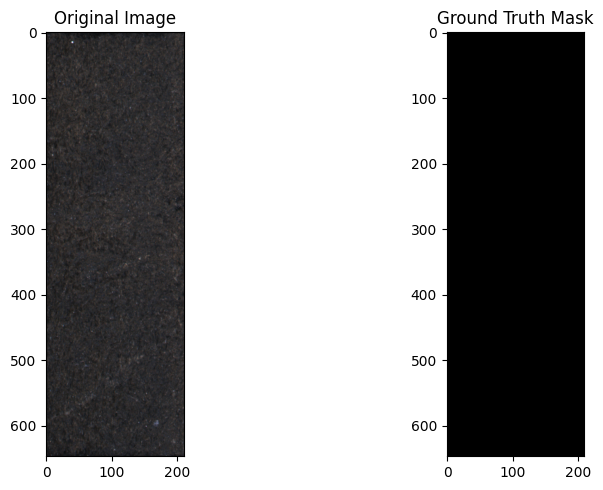

In [14]:
import matplotlib.pyplot as plt
import cv2
import os

# Paths to raw (unprocessed) dataset
img_path = '/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/raw/KolektorSDD/KolektorSDD2/test/20024.png'
mask_path = '/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/raw/KolektorSDD/KolektorSDD2/test/20024_GT.png'

# Check existence
print("Image exists:", os.path.exists(img_path))
print("Mask exists:", os.path.exists(mask_path))

# Load image and mask
img = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError(f"Image not found or unreadable: {img_path}")
if mask is None:
    raise ValueError(f"Mask not found or unreadable: {mask_path}")

# Display image and mask side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth Mask")

plt.tight_layout()
plt.show()


Check if Data is ready for Training

In [16]:
from pathlib import Path

def verify_yolo_dataset(data_dir):
    data_dir = Path(data_dir)
    img_train = list((data_dir / "images/train").glob("*.png"))
    img_val = list((data_dir / "images/val").glob("*.png"))
    lbl_train = list((data_dir / "labels/train").glob("*.txt"))
    lbl_val = list((data_dir / "labels/val").glob("*.txt"))

    empty_train = sum(1 for f in lbl_train if f.stat().st_size == 0)
    empty_val = sum(1 for f in lbl_val if f.stat().st_size == 0)
    non_empty_train = len(lbl_train) - empty_train
    non_empty_val = len(lbl_val) - empty_val

    print(f"Dataset: {data_dir.name}")
    print(f"Train images: {len(img_train)} | Val images: {len(img_val)}")
    print(f"Train labels → Empty: {empty_train}, Non-empty: {non_empty_train}")
    print(f"Val labels   → Empty: {empty_val}, Non-empty: {non_empty_val}")

    if non_empty_train + non_empty_val == 0:
        print("No bounding boxes found. Check your preprocessing.")
    else:
        print("Dataset ready for YOLO training.")

verify_yolo_dataset("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD")


Dataset: KolektorSDD
Train images: 2333 | Val images: 1004
Train labels → Empty: 2087, Non-empty: 246
Val labels   → Empty: 894, Non-empty: 110
Dataset ready for YOLO training.


: 